<a href="https://colab.research.google.com/github/Mathtype6/100-Days-Of-ML-Code/blob/master/tensorflow_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

ctrl+M,然后M启动markdown


In [ ]:
import keras

In [ ]:
file=open("/content/sample_data/california_housing_test.csv")

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import pandas as pd
pd=pd.read_csv("/content/sample_data/california_housing_test.csv",index_col=0)

In [ ]:
print(pd.head())

           latitude  housing_median_age  ...  median_income  median_house_value
longitude                                ...                                   
-122.05       37.37                27.0  ...         6.6085            344700.0
-118.30       34.26                43.0  ...         3.5990            176500.0
-117.81       33.78                27.0  ...         5.7934            270500.0
-118.36       33.82                28.0  ...         6.1359            330000.0
-119.67       36.33                19.0  ...         2.9375             81700.0

[5 rows x 8 columns]


In [48]:
import keras
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model


In [ ]:
help(keras.models)

Help on module keras.models in keras:

NAME
    keras.models - Model-related utilities.

FILE
    /usr/local/lib/python3.6/dist-packages/keras/models.py




In [49]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import tensorflow as tf
np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

df = pd.read_csv('/content/JNJ (1).csv')
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].min(), df['Date'].max()

(Timestamp('1990-11-06 00:00:00'), Timestamp('2020-11-05 00:00:00'))

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close price'))
fig.update_layout(showlegend=True, title='Johnson and Johnson Stock Price 1990-2020')
fig.show()

In [51]:
train, test = df.loc[df['Date'] <= '2015-09-03'], df.loc[df['Date'] > '2015-09-03']
train.shape, test.shape

((6256, 2), (1303, 2))

In [52]:
scaler = StandardScaler()
scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])
train['Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      -1.618517
1      -1.623447
2      -1.625296
3      -1.622830
4      -1.616668
          ...   
6251    1.807874
6252    1.760939
6253    1.686394
6254    1.736090
6255    1.708087
Name: Close, Length: 6256, dtype: float64

In [53]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train[['Close']], train['Close'])
X_test, y_test = create_sequences(test[['Close']], test['Close'])

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (6226, 30, 1)
Testing shape: (1273, 30, 1)


In [54]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 30, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
________________________________________________

In [55]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)


Epoch 1/100
176/176 [==============================] - 13s 73ms/step - loss: 0.1424 - val_loss: 0.1467
Epoch 2/100
176/176 [==============================] - 12s 69ms/step - loss: 0.0839 - val_loss: 0.0859
Epoch 3/100
176/176 [==============================] - 12s 70ms/step - loss: 0.0835 - val_loss: 0.1273
Epoch 4/100
176/176 [==============================] - 12s 71ms/step - loss: 0.0827 - val_loss: 0.0995
Epoch 5/100
176/176 [==============================] - 12s 70ms/step - loss: 0.0845 - val_loss: 0.0733
Epoch 6/100
176/176 [==============================] - 12s 70ms/step - loss: 0.0866 - val_loss: 0.1036
Epoch 7/100
176/176 [==============================] - 12s 70ms/step - loss: 0.0902 - val_loss: 0.1136
Epoch 8/100
176/176 [==============================] - 13s 74ms/step - loss: 0.0919 - val_loss: 0.0926


In [16]:
history

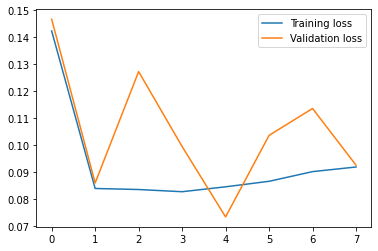

In [56]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

Reconstruction error threshold: 0.9148277991314909


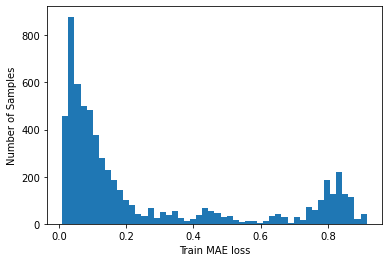

In [57]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

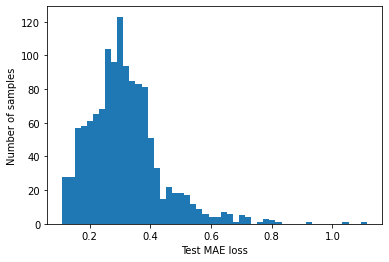

In [58]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

In [59]:

test_score_df = pd.DataFrame(test[TIME_STEPS:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['Close'] = test[TIME_STEPS:]['Close']

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=test_score_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=test_score_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [60]:
anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
anomalies.shape


(3, 5)

In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=scaler.inverse_transform(test_score_df['Close']), name='Close price'))
fig.add_trace(go.Scatter(x=anomalies['Date'], y=scaler.inverse_transform(anomalies['Close']), mode='markers', name='Anomaly'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()